# Sentimentanalyse mit Vader II



### Import

In [1]:
import pandas as pd

### Download mit NLTK
(muss nur einmal gemacht werden)

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\semlakm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Importieren

[NLTK sentiment examples](http://www.nltk.org/howto/sentiment.html)

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Sentiment analyzer instanziieren

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [5]:
sentiment_analyzer.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

### Kommentare laden
Wir laden ein zunächste ein .csv-File https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis/data der FiQA and Financial PhraseBank

In [6]:
df = pd.read_csv('archive/data.csv', delimiter=',')
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [7]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [8]:
def sentiment_scores(dataframe):
    sid_obj = SentimentIntensityAnalyzer()
    
    dataframe['compound'] = dataframe['Sentence'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
    
    def get_sentiment(compound):
        if compound >= 0.05:
            return "positive"
        elif compound <= -0.05:
            return "negative"
        else:
            return "neutral"
        
    dataframe['vader_sentiment'] = dataframe['compound'].apply(get_sentiment)
    return dataframe

df = sentiment_scores(df)

df.head(10)

,Sentence,Sentiment,compound,vader_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,0.5423,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,-0.2023,negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,0.1531,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,0.0000,neutral
4,The Swedish buyout firm has sold its remaining...,neutral,0.0000,neutral
5,$SPY wouldn't be surprised to see a green close,positive,-0.1695,negative
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,-0.2500,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,0.2103,positive
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,0.0000,neutral
9,The Stockmann department store will have a tot...,neutral,0.0000,neutral


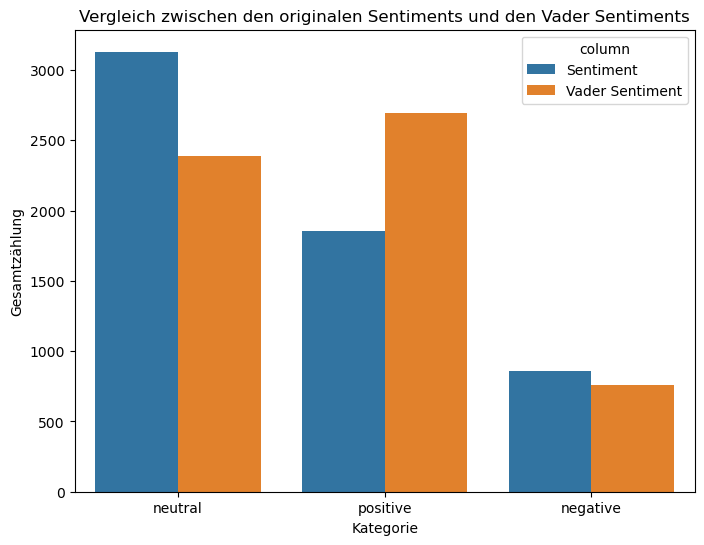

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Erstellt ein long-format DataFrame  - für seaborn einfacher zu plotten
long_format = pd.concat([
    df['Sentiment'].value_counts().rename('count').reset_index().assign(column='Sentiment'),
    df['vader_sentiment'].value_counts().rename('count').reset_index().assign(column='Vader Sentiment')
])

plt.figure(figsize=(8, 6))
sns.barplot(x='index', y='count', hue='column', data=long_format)
plt.xlabel('Kategorie')
plt.ylabel('Gesamtzählung')
plt.title('Vergleich zwischen den originalen Sentiments und den Vader Sentiments')
plt.show()
